In [1]:
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adadelta
import matplotlib.pyplot as plt


In [2]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

([<matplotlib.axis.YTick at 0x1dd7e7339a0>,
 [Text(0, 0.0, '0.0'), Text(0, 0.2, '0.2')])

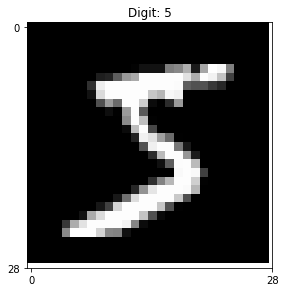

In [3]:
fig = plt.figure()
plt.subplot(1,1,1)
plt.tight_layout()
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([0,28])
plt.yticks([0,28])

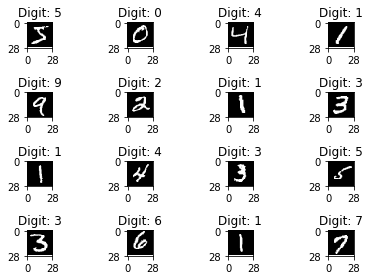

In [4]:
fig = plt.figure()
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([0,28])
  plt.yticks([0,28])
# fig

In [5]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).

img_rows = img_cols = 28


if tensorflow.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)
# print('X_test shape:',X_test.shape)

In [6]:
print(y_train[0])
print(y_train.shape)

5
(60000,)


In [7]:
print(y_test[0])
print(y_train[0])

7
5


In [8]:
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_category)
y_test = to_categorical(y_test, num_category)

In [9]:
print(y_test[0])
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [11]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adadelta(),
              metrics=['accuracy'])

In [12]:
batch_size = 500
num_epoch = 2
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/2
120/120 [==============================] - 77s 626ms/step - loss: 2.3031 - accuracy: 0.1052 - val_loss: 2.2807 - val_accuracy: 0.1113
Epoch 2/2
120/120 [==============================] - 75s 626ms/step - loss: 2.2781 - accuracy: 0.1326 - val_loss: 2.2532 - val_accuracy: 0.2111


In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 2.2531497478485107
Test accuracy: 0.2110999971628189


In [14]:
#Save the model
# serialize model to JSON
# model_digit_json = model.to_json()
# with open("model_digit.json", "w") as json_file:
#     json_file.write(model_digit_json)
# serialize weights to HDF5
# model.save_weights("model_digit.h5")
# print("Saved model to disk")